# An Introduction to Linear Regression
---

**Goal:** By the end of this session, you will understand the core concepts of supervised learning, know the difference between regression and classification, and be able to build, train, and interpret a simple Linear Regression model using Python.

## Review: What is Machine Learning?

At its core, **Machine Learning (ML)** is the science of getting computers to learn and act like humans do, and improve their learning over time in an autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.



1.  **Supervised Learning:** Learning from data that is **labeled**. You provide the algorithm with examples of inputs and their corresponding correct outputs. The goal is to learn a general rule that maps inputs to outputs. (This is our focus today).
2.  **Unsupervised Learning:** Learning from data that is **unlabeled**. The algorithm tries to find patterns, structures, or clusters in the data on its own.
3.  **Reinforcement Learning:** An agent learns to perform actions in an environment to maximize a cumulative reward. It learns by trial and error.

## Supervised Learning

> **Supervised Learning:** Given a dataset of input features **X** and corresponding output labels **y**, we want to learn a function `h` (for hypothesis) such that `h(X)` is a good predictor for **y**.

There are two primary types of supervised learning problems:

### A. Regression: Predicting a Continuous Value
The output `y` is a continuous, numerical value.
- **Question:** Based on a material's temperature, what will its electrical resistance be?
- **Question:** Given the mass of a star, what is its expected luminosity?
- **Our main tool today:** **Linear Regression** See [Visually Explained: Linear regression](https://www.youtube.com/watch?v=CtsRRUddV2s)

### B. Classification: Predicting a Discrete Category
The output `y` is a discrete category or class label.
- **Question:** Based on a cell's size and shape, is it cancerous or benign?
- **Question:** Given the energy and momentum from a particle collider, did we detect an electron or a muon?
- **A common tool:** **Logistic Regression** (despite its name, it's for classification!)

| Feature | Linear Regression | Logistic Regression |
| :---- | :---- | :---- |
| **Problem Type** | Regression (predicting continuous values) | Classification (predicting categorical outcomes) |
| **Output** | Continuous numerical value (e.g., price, temperature) | Probability (0 to 1), which is then mapped to a class |
| **Dependent Variable** | Continuous | Categorical (binary or multi-class) |
| **Underlying Function** | Linear equation: y=β0​+β1​x1​+...+βn​xn​ | Sigmoid (logistic) function applied to a linear equation: p=1+e−(β0​+β1​x1​+...+βn​xn​)1​ |
| **Cost Function** | Mean Squared Error (MSE), Root Mean Squared Error (RMSE) | Log Loss (Binary Cross-Entropy), Cross-Entropy |
| **Interpretation of Coefficients** | Change in the dependent variable for a one-unit change in the independent variable | Change in the log-odds of the dependent variable for a one-unit change in the independent variable |
| **Assumptions** | Linearity, independence of errors, homoscedasticity, normality of residuals, no multicollinearity | Linearity of independent variables with log-odds, independence of observations, no multicollinearity |
| **Common Use Cases** | Predicting house prices, sales forecasting, predicting exam scores, trend analysis | Spam detection, disease prediction (e.g., presence/absence), customer churn prediction, sentiment analysis |
| **Evaluation Metrics** | MSE, RMSE, R-squared, MAE | Accuracy, Precision, Recall, F1-Score, ROC-AUC |



## Linear Regression

Linear Regression is one of the simplest and most interpretable machine learning models. It assumes a linear relationship between the input features and the output variable.

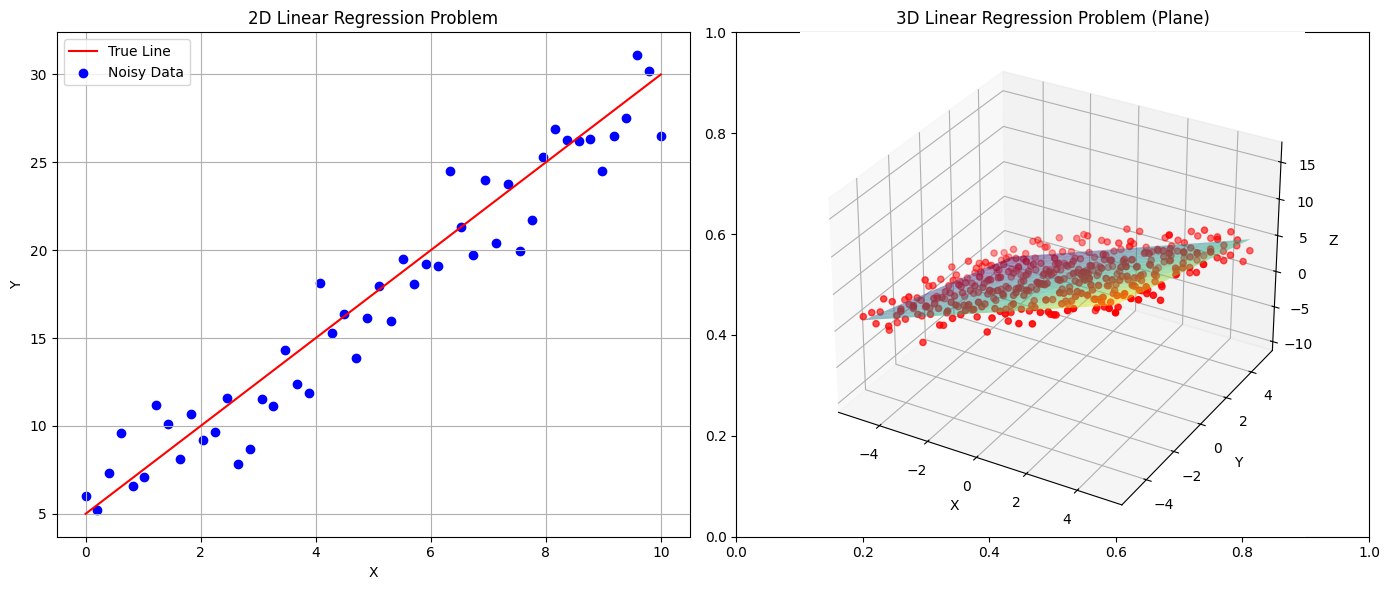

In [18]:
from aux.linear_regression_example_plot import generate_and_plot_regression_problems
fig_regression_problems = generate_and_plot_regression_problems()

### The Goal
To find the "best-fit" line that describes the data. For a single input feature `x`, the equation of the line is:

$$ \hat{y} = \theta_0 + \theta_1 x $$

Where:
- $\hat{y}$ (y-hat) is the **predicted value**.
- $x$ is the **input feature**.
- $\theta_0$ (theta-zero) is the **y-intercept** (also called the bias). It's the value of $\hat{y}$ when $x=0$.
- $\theta_1$ (theta-one) is the **slope** or **coefficient**. It represents the change in $\hat{y}$ for a one-unit change in $x$.

Our goal is to find the optimal values for $\theta_0$ and $\theta_1$ that make our line fit the data as closely as possible. Notice that it is possible to also add non-linear relationships even if the method is called linear regression.

> **Note** In ML, We can apply linear regression to non-linear problems

## How Do We Find the "Best" Line?

We need a way to quantify how "wrong" our line is. We do this with a **Cost Function** (or Loss Function).

1.  For each data point $(x_i, y_i)$, we calculate the difference between the **actual value** ($y_i$) and the **predicted value** ($\hat{y}_i$). This difference is called the **residual** or **error**.
2.  We square these errors (so positive and negative errors don't cancel out) and sum them up.
3.  We take the average.

This gives us the **Mean Squared Error (MSE)** cost function:

$$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 = \frac{1}{2m} \sum_{i=1}^{m} ((\theta_0 + \theta_1 x_i) - y_i)^2 $$

- $m$ is the number of data points.
- $J(\theta_0, \theta_1)$ is the cost for a specific choice of $\theta_0$ and $\theta_1$.

Our goal is to find the values of $\theta_0$ and $\theta_1$ that **minimize** this cost function $J$.

#### Optimization with Gradient Descent

How do we find the minimum of the cost function? We use an algorithm called **Gradient Descent**.

**Analogy:** Imagine you are a hiker in a foggy valley and you want to get to the lowest point. You can't see the whole valley, but you can feel the slope of the ground right under your feet. What do you do? You take a step in the steepest downward direction.

This is exactly what Gradient Descent does:
1.  Start with some random values for $\theta_0$ and $\theta_1$.
2.  Calculate the gradient (the "slope") of the cost function at that point.
3.  Take a small step in the opposite direction of the gradient (downhill).
4.  Repeat until you reach the bottom (the minimum), where the slope is zero.

```{tip}
For a nice visualization of gradient descent, check: <https://aero-learn.imperial.ac.uk/vis/Machine%20Learning/gradient_descent_3d.html>
``` 

The size of the "step" you take is called the **learning rate** (alpha, $\alpha$). A small learning rate will converge slowly, while a large one might overshoot the minimum. See <https://www.youtube.com/watch?v=gsfbWn4Gy5Q>

## A Physics Example - Hooke's Law

Hooke's Law is a fundamental principle in physics that states the force (`F`) needed to extend or compress a spring by some distance (`x`) is directly proportional to that distance.

$$ F = kx $$

This is a perfect linear relationship! We can use linear regression to find the spring constant `k` from experimental data. Let's assume we conducted an experiment and got some noisy measurements.

### Data Generation

In [14]:
# Step 1: Generate some experimental data
import numpy as np

# Let's assume the true spring constant k is 4.5 N/m
k_true = 4.5
np.random.seed(42) # for reproducibility

# Displacement (x) in meters. This is our feature X.
# The .reshape(-1, 1) is needed because scikit-learn expects 2D arrays for features.
x_displacement = np.linspace(0, 2, 20).reshape(-1, 1)

# Force (F) in Newtons. This is our target y.
# We'll calculate the true force and add some random "measurement noise"
noise = np.random.normal(0, 0.5, x_displacement.shape)
y_force = k_true * x_displacement + noise

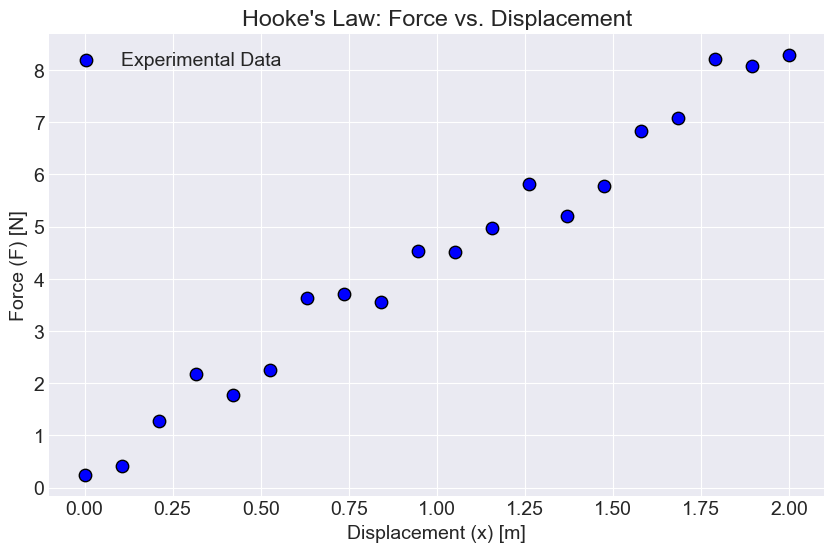

In [15]:
# Step 2: Setup visualization 
import matplotlib.pyplot as plt

# Set up plots for a nice look
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({'font.size': 14, 'figure.figsize': (10, 6)})

# Step 3: Visualize the data
plt.scatter(x_displacement, y_force, color='blue', edgecolor='k', s=80, label='Experimental Data')
plt.xlabel("Displacement (x) [m]")
plt.ylabel("Force (F) [N]")
plt.title("Hooke's Law: Force vs. Displacement")
plt.legend()
plt.show()

This looks like a good candidate for linear regression! The data points roughly follow a straight line.
### Linear regression using `sklearn`

In [24]:
# Build and train the model using Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model object
model = LinearRegression()

# Train the model using our data
# The .fit() method is where the 'learning' (Gradient Descent) happens!
model.fit(x_displacement, y_force)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
# Analyze the results

# Get the learned parameters (theta_0 and theta_1)
# .intercept_ is an array, so we take the first element
theta_0 = model.intercept_[0]
# .coef_ is a 2D array, so we access it with [0][0]
theta_1 = model.coef_[0][0]

print(f"The model has learned the following equation:")
print(f"Force = {theta_0:.3f} + {theta_1:.3f} * Displacement\n")

print(f"The estimated spring constant (k) is: {theta_1:.3f} N/m")
print(f"The true spring constant was: {k_true} N/m")

The model has learned the following equation:
Force = 0.387 + 4.027 * Displacement

The estimated spring constant (k) is: 4.027 N/m
The true spring constant was: 4.5 N/m


That's pretty close! Our model successfully estimated the spring constant from the noisy data. The small non-zero intercept `theta_0` is a result of the random noise we added; in a perfect world, it would be zero.

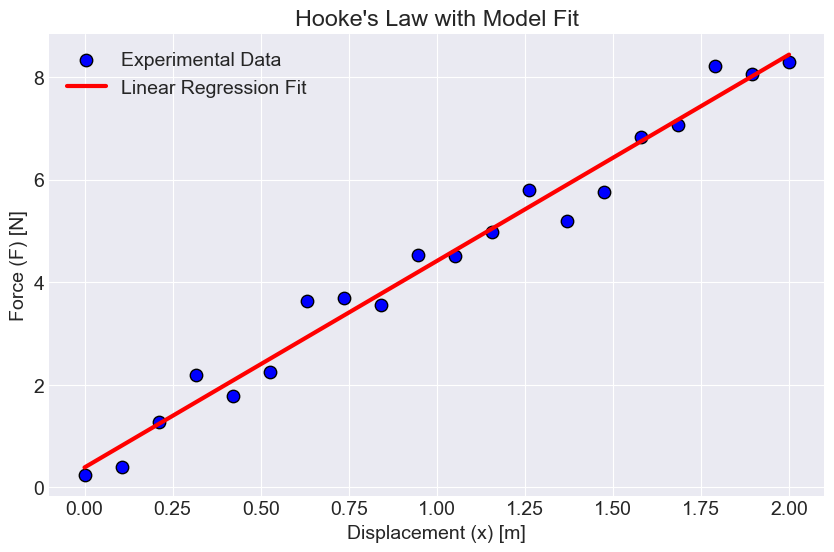

In [27]:
# Visualize the model's fit

# Generate predictions from our model for the x values
y_predicted = model.predict(x_displacement)

# Plot the original data
plt.scatter(x_displacement, y_force, color='blue', edgecolor='k', s=80, label='Experimental Data')

# Plot the regression line
plt.plot(x_displacement, y_predicted, color='red', linewidth=3, label='Linear Regression Fit')

plt.xlabel("Displacement (x) [m]")
plt.ylabel("Force (F) [N]")
plt.title("Hooke's Law with Model Fit")
plt.legend()
plt.show()

## Practice Exercises

Now it's your turn! Apply what you've learned to new scientific datasets.

### Tensorflow/pytorch
Implement the same example but using `tensorflow` and `pytorch`. Compare easy of use.

### Biology - Brain vs. Body Weight

Allometry is the study of the relationship of body size to shape, anatomy, and physiology. It is a well-known fact that the brain weight of mammals generally increases with body weight. Let's model this relationship.

**Task:**
1.  Load the provided data for various mammal species.
2.  The relationship is often modeled on a log-log scale. Transform both `body_wt` and `brain_wt` by taking their natural logarithm (`np.log()`).
3.  Fit a linear regression model to the log-transformed data.
4.  Print the equation of your model.
5.  Plot the log-transformed data as a scatter plot and overlay your regression line.

Model for Log-Transformed Data:
log(brain_wt) = 2.052 + 0.644 * log(body_wt)



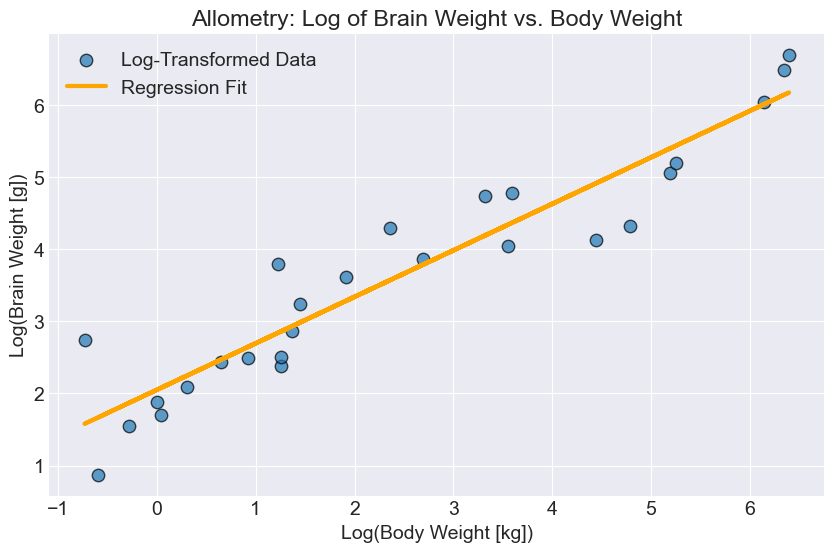

In [28]:
# Data for Exercise 1
body_wt = np.array([3.385, 0.48, 1.35, 465.0, 36.33, 27.66, 1.04, 4.235, 10.55, 0.55, 1.0, 600.0, 3.5, 3.5, 6.8, 35.0, 3.92, 572.0, 180.0, 2.5, 1.92, 119.5, 85.0, 0.75, 14.83, 192.0])
brain_wt = np.array([44.5, 15.5, 8.1, 423.0, 119.5, 115.0, 5.5, 25.6, 73.5, 2.4, 6.6, 812.0, 10.8, 12.3, 37.0, 57.0, 17.5, 655.0, 157.0, 12.1, 11.4, 75.0, 62.0, 4.7, 48.0, 180.0])

# 1. (Data is already loaded)

### BEGIN SOLUTION
# 2. Transform the data
log_body = np.log(body_wt).reshape(-1, 1) # Reshape for scikit-learn
log_brain = np.log(brain_wt)

# 3. Create and fit the model
bio_model = LinearRegression()
bio_model.fit(log_body, log_brain)

# 4. Print the equation
intercept = bio_model.intercept_
slope = bio_model.coef_[0]
print("Model for Log-Transformed Data:")
print(f"log(brain_wt) = {intercept:.3f} + {slope:.3f} * log(body_wt)\n")

# 5. Plot the results
log_brain_pred = bio_model.predict(log_body)

plt.figure(figsize=(10, 6))
plt.scatter(log_body, log_brain, edgecolor='k', alpha=0.7, s=80, label='Log-Transformed Data')
plt.plot(log_body, log_brain_pred, color='orange', linewidth=3, label='Regression Fit')
plt.xlabel("Log(Body Weight [kg])")
plt.ylabel("Log(Brain Weight [g])")
plt.title("Allometry: Log of Brain Weight vs. Body Weight")
plt.legend()
plt.show()
### END SOLUTION

## Conclusion & What's Next?

**Key Takeaways:**
- Supervised learning uses **labeled data** (X, y) to learn a predictive function.
- **Regression** predicts continuous values, while **Classification** predicts discrete categories.
- **Linear Regression** finds the best-fit line by minimizing a **cost function** (like MSE).
- **Gradient Descent** is the optimization algorithm used to find the model parameters that minimize the cost.
- Libraries like **Scikit-Learn** make it incredibly easy to implement these powerful models.

**What's Next?**
- What if our data isn't linear? We can use **Polynomial Regression**.
- How do we handle classification problems? We'll use models like **Logistic Regression** and **Support Vector Machines**.
- What happens when we have many features? We need to be careful about **overfitting** and use techniques like **regularization**.